In [10]:
from sola.main_classes import spaces
from sola.main_classes import domains
from sola.main_classes import functions
from sola.main_classes import mappings
import matplotlib.pyplot as plt
import seaborn as sns

# Create color Palette
colors = sns.color_palette('YlGnBu', n_colors=100)

In [11]:
domain = domains.HyperParalelipiped([[-1, 1]])
M = spaces.PCb(domain=domain)

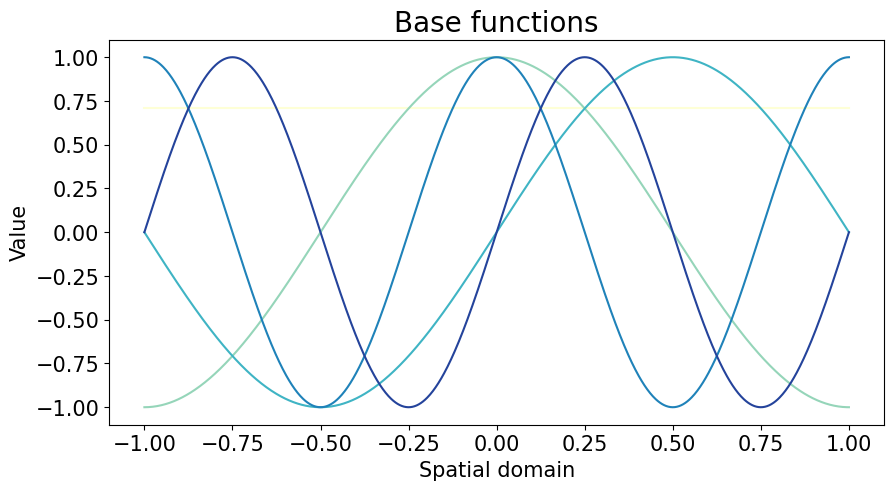

In [12]:
%matplotlib inline
########################
# Create basis functions
########################
# Edit region---------------------------------------------------------
# Maximum Fourier order
max_order = 3
# Edit region---------------------------------------------------------

base_functions = []
plt.figure(figsize=(10, 5))
base_functions.append(functions.Fourier(domain=domain, type='cos', order=0))
plt.plot(domain.mesh,
         base_functions[0].evaluate(domain.mesh),
         color=colors[0])
for index in range(1, max_order):
    base_functions.append(functions.Fourier(domain=domain, type='cos', order=index))
    base_functions.append(functions.Fourier(domain=domain, type='sin', order=index))
    plt.plot(domain.mesh,
             base_functions[2 * index - 1].evaluate(domain.mesh),
             color=colors[int(100 * (2 * index) / (2 * max_order))])
    plt.plot(domain.mesh,
             base_functions[2 * index].evaluate(domain.mesh),
             color=colors[int(100 * (2 * index + 1) / (2 * max_order))])
plt.title('Base functions', fontsize=20)
plt.xlabel('Spatial domain', fontsize=15)
plt.ylabel('Value', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [13]:
subspace = spaces.Subspace(space=M, basis=base_functions)

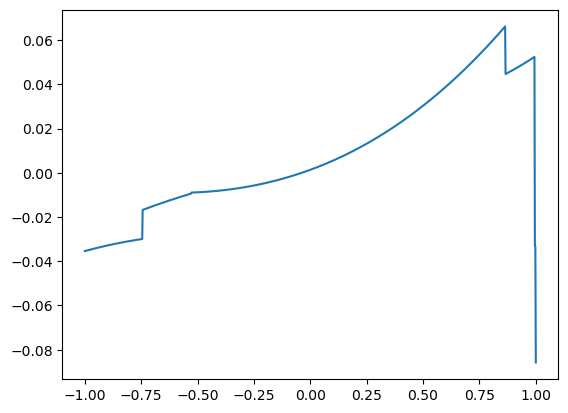

In [14]:
random_member = M.random_member(seed=1)
random_member.plot()

In [15]:
projection = mappings.Projection(domain=M, codomain=subspace)

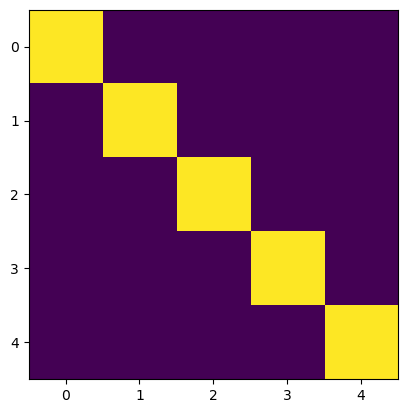

In [16]:
plt.imshow(projection.gram_matrix.matrix)